In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import display

import seaborn as sns
sns.set(style='whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 10000)

In [2]:
path = 'ppdai_3_23'
loan_periodic = pd.read_csv(path + '/LP_handle.csv')
loan_periodic = loan_periodic.rename(columns={'到期日期': 'dueDate', '还款日期': 'payDate', '还款状态': 'status', "期数": "period", "应还本金": "capital"
                                             ,"应还利息": "interest", "剩余本金": "leftCap", "剩余利息": "leftInt"})
loan_periodic.drop(["Unnamed: 0"], axis=1, inplace=True)
print(loan_periodic.shape)

(3203276, 11)


In [3]:
display(loan_periodic.head(2))
display(loan_periodic.tail(2))

,ListingId,period,status,capital,interest,leftCap,leftInt,dueDate,payDate,recorddate,overDue
0,126541,1,1,1380.23,270.00,0.0,0.0,2015-06-04,2015-06-04,2017-02-22,0
1,126541,2,1,1400.94,249.29,0.0,0.0,2015-07-04,2015-07-04,2017-02-22,0


,ListingId,period,status,capital,interest,leftCap,leftInt,dueDate,payDate,recorddate,overDue
3203274,32819531,11,0,310.48,11.48,310.48,11.48,2017-12-30,\N,2017-02-22,-9999
3203275,32819531,12,0,316.16,5.80,316.16,5.80,2018-01-30,\N,2017-02-22,-9999


(213695, 11)
(591960, 11)
   ListingId  period  status  capital  interest  leftCap  leftInt     dueDate     payDate  recorddate  overDue
6     126541       7       2  1509.21    141.02      0.0      0.0  2015-12-04  2015-12-05  2017-02-22        1
8     126541       9       2  1554.82     95.41      0.0      0.0  2016-02-04  2016-02-05  2017-02-22        1


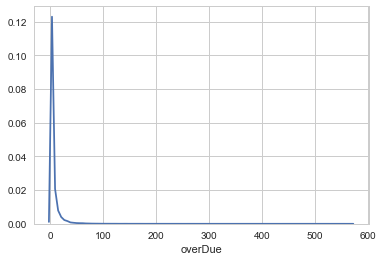

In [4]:
#loan_periodic_2 = loan_periodic[(loan_periodic.status != 0) & (loan_periodic.overDue < 30) & (loan_periodic.overDue >0)]
loan_periodic_overDue_great_0 = loan_periodic[(loan_periodic.overDue > 0)]
print(loan_periodic_overDue_great_0.shape)

loan_periodic_overDue_greatEqual_0 = loan_periodic[(loan_periodic.overDue >= 0)]
print(loan_periodic_overDue_greatEqual_0.shape)

print(loan_periodic_overDue_great_0.head(2))
sns.distplot(loan_periodic_overDue_great_0['overDue'], kde=True, hist=False)
plt.show()

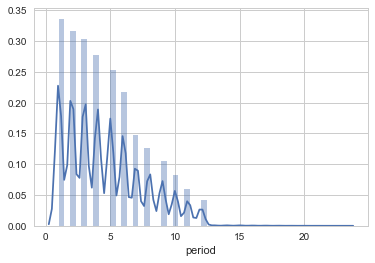

In [5]:
sns.distplot(loan_periodic_overDue_great_0['period'], kde=True, hist=True)
plt.show()

In [6]:
loan_characteristics = pd.read_csv(path + '/LC_handle.csv')
loan_characteristics = loan_characteristics.rename(columns={
        '初始评级': 'initialGrade', '性别': 'sex', "借款期限": "totalPeriod","历史逾期还款期数":"overDuePeriod",
    "历史正常还款期数": "repayment", "借款金额": "money", "年龄": "age", "手机认证": "phone", "户口认证": "census", "视频认证": "video",
    "学历认证": "edu", "征信认证": "credit", "淘宝认证": "taobao", "是否首标":"firstLoan", "借款类型": "loanType"})
loan_characteristics.replace(to_replace="成功认证", value='Y',inplace=True, regex=False)
loan_characteristics.replace(to_replace="未成功认证", value='N',inplace=True, regex=False)
display(loan_characteristics.shape)
display(loan_characteristics.head(1))

(328553, 23)

,Unnamed: 0,ListingId,money,totalPeriod,借款利率,借款成功日期,initialGrade,loanType,firstLoan,age,sex,phone,census,video,edu,credit,taobao,历史成功借款次数,历史成功借款金额,总待还本金,repayment,overDuePeriod,maxOverDue
0,0,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,Y,N,Y,N,N,N,11,40326.0,8712.73,57,16,2.0


In [7]:
loan_exceed = pd.merge(loan_periodic_overDue_great_0, loan_characteristics)
loan_all = pd.merge(loan_periodic_overDue_greatEqual_0, loan_characteristics)
print(loan_all.shape)
print(loan_exceed.shape)
display(loan_exceed.head(2))

(591960, 33)
(213695, 33)


,ListingId,period,status,capital,interest,leftCap,leftInt,dueDate,payDate,recorddate,overDue,Unnamed: 0,money,totalPeriod,借款利率,借款成功日期,initialGrade,loanType,firstLoan,age,sex,phone,census,video,edu,credit,taobao,历史成功借款次数,历史成功借款金额,总待还本金,repayment,overDuePeriod,maxOverDue
0,126541,7,2,1509.21,141.02,0.0,0.0,2015-12-04,2015-12-05,2017-02-22,1,0,18000,12,18.0,2015-05-04,C,其他,否,35,男,Y,N,Y,N,N,N,11,40326.0,8712.73,57,16,2.0
1,126541,9,2,1554.82,95.41,0.0,0.0,2016-02-04,2016-02-05,2017-02-22,1,0,18000,12,18.0,2015-05-04,C,其他,否,35,男,Y,N,Y,N,N,N,11,40326.0,8712.73,57,16,2.0


In [8]:
display(loan_characteristics.shape)
loan_characteristics = loan_characteristics.dropna()
display(loan_characteristics.shape)

(328553, 23)

(188266, 23)

In [9]:
config_show_normalize = False
config_show_sort = False

def show_column_infor_for_loan_characteristics(loan_characteristics, column_name, show=True):
    loan_characteristics_0 = loan_characteristics[(loan_characteristics.maxOverDue <= 0)]
    loan_characteristics_0_30 = loan_characteristics[(loan_characteristics.maxOverDue <= 30) & (loan_characteristics.maxOverDue > 0)]
    loan_characteristics_30_90 = loan_characteristics[(loan_characteristics.maxOverDue <= 90) & (loan_characteristics.maxOverDue > 30)]
    loan_characteristics_90_180 = loan_characteristics[(loan_characteristics.maxOverDue <= 180) & (loan_characteristics.maxOverDue > 90)]
    loan_characteristics_180_360 = loan_characteristics[(loan_characteristics.maxOverDue <= 360)& (loan_characteristics.maxOverDue > 180)]
    loan_characteristics_360_ = loan_characteristics[loan_characteristics.maxOverDue > 360]

    loan_characteristics_over30 = loan_characteristics[(loan_characteristics.maxOverDue > 30)]
    loan_characteristics_over90 = loan_characteristics[(loan_characteristics.maxOverDue > 90)]

    config_show_normalize = False
    df_temp = pd.concat([
    loan_characteristics[column_name].value_counts(config_show_normalize),
        loan_characteristics_0[column_name].value_counts(config_show_normalize),
    loan_characteristics_0_30[column_name].value_counts(config_show_normalize),
    loan_characteristics_30_90[column_name].value_counts(config_show_normalize),
    loan_characteristics_over30[column_name].value_counts(config_show_normalize),
    loan_characteristics_over90[column_name].value_counts(config_show_normalize),
    loan_characteristics_360_[column_name].value_counts(config_show_normalize)
                        ], axis=1)
    
    columns_name = ['all','exceedall','0-30','30-90','>30','>90','>360']
    for index in range(len(columns_name)):
        df_temp.columns.values[index] = columns_name[index]
    
    for column_rate in ["exceedall", '0-30','30-90','>30','>90','>360']:
        df_temp["rate" + column_rate] = df_temp[column_rate] / df_temp["all"]
    
    config_show_normalize = True
    df_temp_normalize = pd.concat([
    loan_characteristics[column_name].value_counts(config_show_normalize),
    loan_characteristics_0[column_name].value_counts(config_show_normalize),
    loan_characteristics_0_30[column_name].value_counts(config_show_normalize),
    loan_characteristics_30_90[column_name].value_counts(config_show_normalize),
    loan_characteristics_over30[column_name].value_counts(config_show_normalize),
    loan_characteristics_over90[column_name].value_counts(config_show_normalize),
    loan_characteristics_360_[column_name].value_counts(config_show_normalize)
                        ], axis=1)
    for index in range(len(columns_name)):
        df_temp_normalize.columns.values[index] = columns_name[index]
    
#     if df_temp.shape[0] < 100:
#         for index, row in df_temp.iterrows():
#             print(row.to_frame().T)
#     else:
    
    if show:
        print("")
        print(column_name)
        display(df_temp)
        display(df_temp_normalize)
    return df_temp, df_temp_normalize

def cal_by_cut(df, cut_range, column_name):
    df[column_name] = df.index
#     df_age_cut = df_age.groupby([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4,
#        4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8]).sum()
    df_cut = df.groupby(pd.cut(df[column_name], cut_range)).sum()
    for column_rate in ["exceedall", '0-30','30-90','>30','>90','>360']:
        df_cut["rate" + column_rate] = df_cut[column_rate] / df_cut["all"]
    return df_cut

def feature_engineer(loan_characteristics):
    df_sex, df_sex_nor = show_column_infor_for_loan_characteristics(loan_characteristics, "sex")
    show_column_infor_for_loan_characteristics(loan_characteristics, "initialGrade")
    
    pd.set_option('display.max_rows', 50)
#     df_overDuePeriod, df_overDuePeriod_nor = show_column_infor_for_loan_characteristics(loan_characteristics, "overDuePeriod", False)
#     display("overDuePeriod")
#     display(df_overDuePeriod.head(15))

    show_column_infor_for_loan_characteristics(loan_characteristics, "totalPeriod", True)
    show_column_infor_for_loan_characteristics(loan_characteristics, "repayment", False)
    df_money, df_money_nor = show_column_infor_for_loan_characteristics(loan_characteristics, "money", False)
    df_age, df_age_nor = show_column_infor_for_loan_characteristics(loan_characteristics, "age", False)
    pd.set_option('display.max_rows', 8)
#     show_column_infor_for_loan_characteristics(loan_characteristics, "phone")
#     show_column_infor_for_loan_characteristics(loan_characteristics, "census")
#     show_column_infor_for_loan_characteristics(loan_characteristics, "video")
#     show_column_infor_for_loan_characteristics(loan_characteristics, "edu")
#     show_column_infor_for_loan_characteristics(loan_characteristics, "credit")
#     show_column_infor_for_loan_characteristics(loan_characteristics, "taobao")

#     show_column_infor_for_loan_characteristics(loan_characteristics, "firstLoan")
#     show_column_infor_for_loan_characteristics(loan_characteristics, "loanType")
    
    pd.set_option('display.max_rows', 100)

#     cut_range = np.append(0, np.append(np.arange(4,13)*5, 100))
#     display(cal_by_cut(df_age, cut_range, "age"))
    
#     cut_range = np.append(np.arange(0,15)*1000, np.append(np.arange(3,9)*5000, 1000000))
#     display(cal_by_cut(df_money, cut_range, "money"))
    
#     cut_range = np.append(np.arange(-1,15)*1000, np.append(np.arange(3,6)*5000, 1000000))
#     df_temp, df_temp_nor = show_column_infor_for_loan_characteristics(loan_characteristics, "总待还本金", False)
#     display(cal_by_cut(df_temp, cut_range, "总待还本金"))
    
#     df_temp, df_temp_nor = show_column_infor_for_loan_characteristics(loan_characteristics, "历史成功借款次数", False)
#     cut_range = np.append(np.arange(-1, 21), 1000000)
#     display(cal_by_cut(df_temp, cut_range, "历史成功借款次数"))
    
    cut_range = np.append(np.arange(-1,15)*1000, np.append(np.arange(3,6)*5000, 1000000))
    df_temp, df_temp_nor = show_column_infor_for_loan_characteristics(loan_characteristics, "历史成功借款金额", False)
    display(cal_by_cut(df_temp, cut_range, "历史成功借款金额"))
    pd.set_option('display.max_rows', 8)

display(loan_characteristics.shape)
feature_engineer(loan_characteristics)

(188266, 23)


sex


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360
男,127818,68040,56641,2784,3137,353,21,0.532319,0.443138,0.021781,0.024543,0.002762,0.000164
女,60448,33012,26576,781,860,79,8,0.546122,0.439651,0.012920,0.014227,0.001307,0.000132


,all,exceedall,0-30,30-90,>30,>90,>360
男,0.678922,0.673317,0.680642,0.780926,0.784839,0.81713,0.724138
女,0.321078,0.326683,0.319358,0.219074,0.215161,0.18287,0.275862



initialGrade


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360
A,5495,3387,2009,76,99,23,1,0.616379,0.365605,0.013831,0.018016,0.004186,0.000182
B,17829,10571,6958,252,300,48,1,0.592910,0.390263,0.014134,0.016827,0.002692,0.000056
C,73695,43467,29172,952,1056,104,6,0.589823,0.395848,0.012918,0.014329,0.001411,0.000081
D,78027,38609,37539,1711,1879,168,8,0.494816,0.481103,0.021928,0.024081,0.002153,0.000103
E,12264,4643,7031,524,590,66,6,0.378588,0.573304,0.042727,0.048108,0.005382,0.000489
F,956,375,508,50,73,23,7,0.392259,0.531381,0.052301,0.076360,0.024059,0.007322


,all,exceedall,0-30,30-90,>30,>90,>360
A,0.029187,0.033517,0.024142,0.021318,0.024769,0.053241,0.034483
B,0.094701,0.104610,0.083613,0.070687,0.075056,0.111111,0.034483
C,0.391441,0.430145,0.350553,0.267041,0.264198,0.240741,0.206897
D,0.414451,0.382071,0.451098,0.479944,0.470103,0.388889,0.275862
E,0.065142,0.045947,0.084490,0.146985,0.147611,0.152778,0.206897
F,0.005078,0.003711,0.006105,0.014025,0.018264,0.053241,0.241379



totalPeriod


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360
1,29,21.0,8.0,NaN,NaN,NaN,NaN,0.724138,0.275862,NaN,NaN,NaN,NaN
2,357,145.0,179.0,29.0,33.0,4.0,1.0,0.406162,0.501401,0.081232,0.092437,0.011204,0.002801
3,1057,557.0,455.0,39.0,45.0,6.0,NaN,0.526963,0.430464,0.036897,0.042573,0.005676,NaN
4,62,14.0,40.0,7.0,8.0,1.0,NaN,0.225806,0.645161,0.112903,0.129032,0.016129,NaN
5,53,15.0,35.0,2.0,3.0,1.0,NaN,0.283019,0.660377,0.037736,0.056604,0.018868,NaN
6,48327,28804.0,18780.0,671.0,743.0,72.0,11.0,0.596023,0.388603,0.013885,0.015374,0.001490,0.000228
7,811,394.0,380.0,27.0,37.0,10.0,2.0,0.485820,0.468557,0.033292,0.045623,0.012330,0.002466
8,1085,661.0,409.0,11.0,15.0,4.0,NaN,0.609217,0.376959,0.010138,0.013825,0.003687,NaN
9,6967,3797.0,3077.0,83.0,93.0,10.0,1.0,0.544998,0.441654,0.011913,0.013349,0.001435,0.000144
10,3032,1939.0,1066.0,23.0,27.0,4.0,NaN,0.639512,0.351583,0.007586,0.008905,0.001319,NaN


,all,exceedall,0-30,30-90,>30,>90,>360
1,0.000154,0.000208,0.000096,NaN,NaN,NaN,NaN
2,0.001896,0.001435,0.002151,0.008135,0.008256,0.009259,0.034483
3,0.005614,0.005512,0.005468,0.010940,0.011258,0.013889,NaN
4,0.000329,0.000139,0.000481,0.001964,0.002002,0.002315,NaN
5,0.000282,0.000148,0.000421,0.000561,0.000751,0.002315,NaN
6,0.256695,0.285041,0.225675,0.188219,0.185889,0.166667,0.379310
7,0.004308,0.003899,0.004566,0.007574,0.009257,0.023148,0.068966
8,0.005763,0.006541,0.004915,0.003086,0.003753,0.009259,NaN
9,0.037006,0.037575,0.036976,0.023282,0.023267,0.023148,0.034483
10,0.016105,0.019188,0.012810,0.006452,0.006755,0.009259,NaN


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360,历史成功借款金额
历史成功借款金额,,,,,,,,,,,,,,
"(-1000, 0]",59623,26721.0,30795.0,1870.0,2107.0,237.0,16.0,0.448166,0.516495,0.031364,0.035339,0.003975,0.000268,0.000000e+00
"(0, 1000]",4931,2357.0,2448.0,122.0,126.0,4.0,NaN,0.477996,0.496451,0.024741,0.025553,0.000811,NaN,1.160900e+05
"(1000, 2000]",8581,4421.0,3962.0,186.0,198.0,12.0,NaN,0.515208,0.461718,0.021676,0.023074,0.001398,NaN,8.765310e+05
"(2000, 3000]",10627,5500.0,4872.0,227.0,255.0,28.0,2.0,0.517550,0.458455,0.021361,0.023995,0.002635,0.000188,1.884663e+06
"(3000, 4000]",9417,5060.0,4188.0,149.0,169.0,20.0,1.0,0.537326,0.444728,0.015822,0.017946,0.002124,0.000106,2.889606e+06
"(4000, 5000]",10917,6178.0,4577.0,143.0,162.0,19.0,NaN,0.565906,0.419254,0.013099,0.014839,0.001740,NaN,3.851567e+06
"(5000, 6000]",8699,4960.0,3624.0,107.0,115.0,8.0,NaN,0.570180,0.416600,0.012300,0.013220,0.000920,NaN,4.807083e+06
"(6000, 7000]",8671,4997.0,3551.0,108.0,123.0,15.0,1.0,0.576289,0.409526,0.012455,0.014185,0.001730,0.000115,6.090388e+06
"(7000, 8000]",7338,4287.0,2953.0,83.0,98.0,15.0,1.0,0.584219,0.402426,0.011311,0.013355,0.002044,0.000136,6.966519e+06


In [16]:
feature_engineer(loan_characteristics[(loan_characteristics.initialGrade == "C") & (loan_characteristics.totalPeriod == 6)])


sex


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360
女,11216,6732,4380,96,104,8,2,0.600214,0.390514,0.008559,0.009272,0.000713,0.000178
男,22856,13827,8689,309,340,31,2,0.604961,0.380163,0.013519,0.014876,0.001356,0.000088


,all,exceedall,0-30,30-90,>30,>90,>360
女,0.329185,0.327448,0.335144,0.237037,0.234234,0.205128,0.5
男,0.670815,0.672552,0.664856,0.762963,0.765766,0.794872,0.5



initialGrade


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360
C,34072,20559,13069,405,444,39,4,0.603399,0.38357,0.011887,0.013031,0.001145,0.000117


,all,exceedall,0-30,30-90,>30,>90,>360
C,1.0,1.0,1.0,1.0,1.0,1.0,1.0



totalPeriod


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360
6,34072,20559,13069,405,444,39,4,0.603399,0.38357,0.011887,0.013031,0.001145,0.000117


,all,exceedall,0-30,30-90,>30,>90,>360
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360,历史成功借款金额
历史成功借款金额,,,,,,,,,,,,,,
"(-1000, 0]",3203,1603.0,1497.0,98.0,103.0,5.0,NaN,0.500468,0.467374,0.030596,0.032157,0.001561,NaN,0.000000e+00
"(0, 1000]",791,408.0,360.0,23.0,23.0,NaN,NaN,0.515803,0.455120,0.029077,0.029077,NaN,NaN,3.435300e+04
"(1000, 2000]",1376,738.0,612.0,26.0,26.0,NaN,NaN,0.536337,0.444767,0.018895,0.018895,NaN,NaN,3.467490e+05
"(2000, 3000]",1819,1024.0,765.0,22.0,30.0,8.0,1.0,0.562947,0.420561,0.012095,0.016493,0.004398,0.000550,8.204160e+05
"(3000, 4000]",1718,1007.0,693.0,16.0,18.0,2.0,1.0,0.586147,0.403376,0.009313,0.010477,0.001164,0.000582,1.250980e+06
"(4000, 5000]",2536,1533.0,969.0,30.0,34.0,4.0,NaN,0.604495,0.382098,0.011830,0.013407,0.001577,NaN,1.956316e+06
"(5000, 6000]",2204,1358.0,821.0,23.0,25.0,2.0,NaN,0.616152,0.372505,0.010436,0.011343,0.000907,NaN,2.183158e+06
"(6000, 7000]",2122,1294.0,809.0,19.0,19.0,NaN,NaN,0.609802,0.381244,0.008954,0.008954,NaN,NaN,3.160185e+06
"(7000, 8000]",1864,1151.0,685.0,22.0,28.0,6.0,1.0,0.617489,0.367489,0.011803,0.015021,0.003219,0.000536,3.882072e+06


In [16]:
loan_characteristics_b = loan_characteristics[loan_characteristics.initialGrade == "B"]
feature_engineer(loan_characteristics_b)


sex


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360
女,7972,4822,3045,93,105,12,1.0,0.604867,0.381962,0.011666,0.013171,0.001505,0.000125
男,9857,5749,3913,159,195,36,NaN,0.583240,0.396977,0.016131,0.019783,0.003652,NaN


,all,exceedall,0-30,30-90,>30,>90,>360
女,0.447137,0.456154,0.437626,0.369048,0.35,0.25,1.0
男,0.552863,0.543846,0.562374,0.630952,0.65,0.75,NaN



initialGrade


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360
B,17829,10571,6958,252,300,48,1,0.59291,0.390263,0.014134,0.016827,0.002692,0.000056


,all,exceedall,0-30,30-90,>30,>90,>360
B,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360,历史成功借款金额
历史成功借款金额,,,,,,,,,,,,,,
"(-1000, 0]",5677,2879.0,2642.0,123.0,156.0,33.0,1.0,0.507134,0.465387,0.021666,0.027479,0.005813,0.000176,0.000000e+00
"(0, 1000]",449,199.0,242.0,8.0,8.0,NaN,NaN,0.443207,0.538976,0.017817,0.017817,NaN,NaN,3.801900e+04
"(1000, 2000]",835,388.0,424.0,22.0,23.0,1.0,NaN,0.464671,0.507784,0.026347,0.027545,0.001198,NaN,2.970710e+05
"(2000, 3000]",817,442.0,355.0,17.0,20.0,3.0,NaN,0.541004,0.434517,0.020808,0.024480,0.003672,NaN,6.914870e+05
"(3000, 4000]",718,368.0,335.0,15.0,15.0,NaN,NaN,0.512535,0.466574,0.020891,0.020891,NaN,NaN,9.605260e+05
"(4000, 5000]",732,430.0,292.0,7.0,10.0,3.0,NaN,0.587432,0.398907,0.009563,0.013661,0.004098,NaN,1.308396e+06
"(5000, 6000]",648,369.0,269.0,10.0,10.0,NaN,NaN,0.569444,0.415123,0.015432,0.015432,NaN,NaN,1.513861e+06
"(6000, 7000]",689,444.0,236.0,9.0,9.0,NaN,NaN,0.644412,0.342525,0.013062,0.013062,NaN,NaN,1.575212e+06
"(7000, 8000]",542,331.0,208.0,3.0,3.0,NaN,NaN,0.610701,0.383764,0.005535,0.005535,NaN,NaN,1.824949e+06


In [17]:
loan_characteristics_c = loan_characteristics[loan_characteristics.initialGrade == "C"]
feature_engineer(loan_characteristics_c)


sex


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360
女,24431,14298,9878,228,255,27,3,0.585240,0.404322,0.009332,0.010438,0.001105,0.000123
男,49264,29169,19294,724,801,77,3,0.592096,0.391645,0.014696,0.016259,0.001563,0.000061


,all,exceedall,0-30,30-90,>30,>90,>360
女,0.331515,0.328939,0.338612,0.239496,0.241477,0.259615,0.5
男,0.668485,0.671061,0.661388,0.760504,0.758523,0.740385,0.5



initialGrade


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360
C,73695,43467,29172,952,1056,104,6,0.589823,0.395848,0.012918,0.014329,0.001411,0.000081


,all,exceedall,0-30,30-90,>30,>90,>360
C,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,all,exceedall,0-30,30-90,>30,>90,>360,rateexceedall,rate0-30,rate30-90,rate>30,rate>90,rate>360,历史成功借款金额
历史成功借款金额,,,,,,,,,,,,,,
"(-1000, 0]",8688,4197.0,4235.0,238.0,256.0,18.0,NaN,0.483080,0.487454,0.027394,0.029466,0.002072,NaN,0.000000e+00
"(0, 1000]",1666,856.0,775.0,35.0,35.0,NaN,NaN,0.513806,0.465186,0.021008,0.021008,NaN,NaN,5.095400e+04
"(1000, 2000]",3058,1656.0,1342.0,57.0,60.0,3.0,NaN,0.541530,0.438849,0.018640,0.019621,0.000981,NaN,5.214750e+05
"(2000, 3000]",4003,2202.0,1731.0,58.0,70.0,12.0,1.0,0.550087,0.432426,0.014489,0.017487,0.002998,0.000250,1.221074e+06
"(3000, 4000]",3874,2211.0,1606.0,50.0,57.0,7.0,1.0,0.570728,0.414559,0.012907,0.014713,0.001807,0.000258,1.801605e+06
"(4000, 5000]",5283,3131.0,2078.0,67.0,74.0,7.0,NaN,0.592656,0.393337,0.012682,0.014007,0.001325,NaN,2.748531e+06
"(5000, 6000]",4294,2605.0,1639.0,46.0,50.0,4.0,NaN,0.606660,0.381695,0.010713,0.011644,0.000932,NaN,3.326841e+06
"(6000, 7000]",4340,2610.0,1674.0,48.0,56.0,8.0,1.0,0.601382,0.385714,0.011060,0.012903,0.001843,0.000230,4.792704e+06
"(7000, 8000]",3833,2331.0,1449.0,43.0,53.0,10.0,1.0,0.608140,0.378033,0.011218,0.013827,0.002609,0.000261,5.654596e+06


In [212]:
loan_exceed_cut = pd.cut(loan_exceed["overDuePeriod"], [0,1,2,3,4, 26])
df_temp = pd.concat([loan_exceed["overDuePeriod"], pd.cut(loan_exceed["overDuePeriod"], [0,1,2,3,4, 26])], axis=1)
df_temp.columns.values[0] = 'origin'
df_temp.columns.values[1] = 'cut'

# print(df_temp.head(50))


loan_exceed_cut = pd.cut(loan_exceed["money"], [0,1000,2500,5000,8000, 20000,50000,600000])
df_temp = pd.concat([loan_exceed, loan_exceed_cut], axis=1)
#df_temp.columns.values[0] = 'origin'
df_temp.columns.values[len(df_temp.columns) -1] = 'cut'

print(df_temp.groupby("cut")["overDue"].count())
print(df_temp.groupby("cut")["overDue"].size())
display(df_temp.head(3))

cut
(0, 1000]          18353
(1000, 2500]       43028
(2500, 5000]       89232
(5000, 8000]       49097
(8000, 20000]      12364
(20000, 50000]       837
(50000, 600000]      784
Name: overDue, dtype: int64
cut
(0, 1000]          18353
(1000, 2500]       43028
(2500, 5000]       89232
(5000, 8000]       49097
(8000, 20000]      12364
(20000, 50000]       837
(50000, 600000]      784
dtype: int64


,ListingId,period,status,capital,interest,leftCap,leftInt,dueDate,payDate,recorddate,overDue,Unnamed: 0,money,totalPeriod,借款利率,借款成功日期,initialGrade,借款类型,是否首标,age,sex,phone,census,video,edu,credit,taobao,历史成功借款次数,历史成功借款金额,总待还本金,repayment,overDuePeriod,maxOverDue,cut
0,126541,7,2,1509.21,141.02,0.0,0.0,2015-12-04,2015-12-05,2017-02-22,1,0,18000,12,18.0,2015-05-04,C,其他,否,35,男,Y,N,Y,N,N,N,11,40326.0,8712.73,57,16,2.0,"(8000, 20000]"
1,126541,9,2,1554.82,95.41,0.0,0.0,2016-02-04,2016-02-05,2017-02-22,1,0,18000,12,18.0,2015-05-04,C,其他,否,35,男,Y,N,Y,N,N,N,11,40326.0,8712.73,57,16,2.0,"(8000, 20000]"
2,126541,10,2,1578.15,72.08,0.0,0.0,2016-03-04,2016-03-06,2017-02-22,2,0,18000,12,18.0,2015-05-04,C,其他,否,35,男,Y,N,Y,N,N,N,11,40326.0,8712.73,57,16,2.0,"(8000, 20000]"


count    213695.000000
mean       4757.627712
std        9763.986085
min         100.000000
25%        2300.000000
50%        3980.000000
75%        5600.000000
max      500000.000000
Name: money, dtype: float64


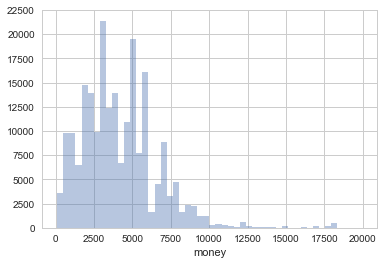

In [174]:
print(loan_exceed["money"].describe())
loan_exceed_temp = loan_exceed[(loan_exceed.money < 20000)]
sns.distplot(loan_exceed_temp['money'], kde=False, hist=True)
plt.show()